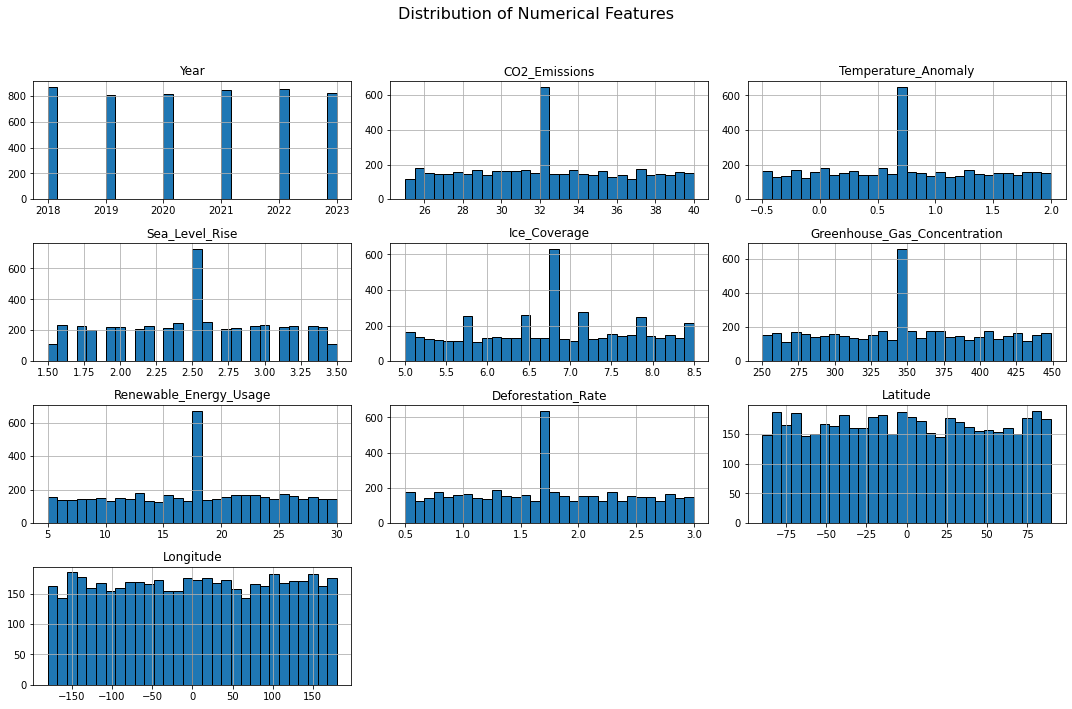

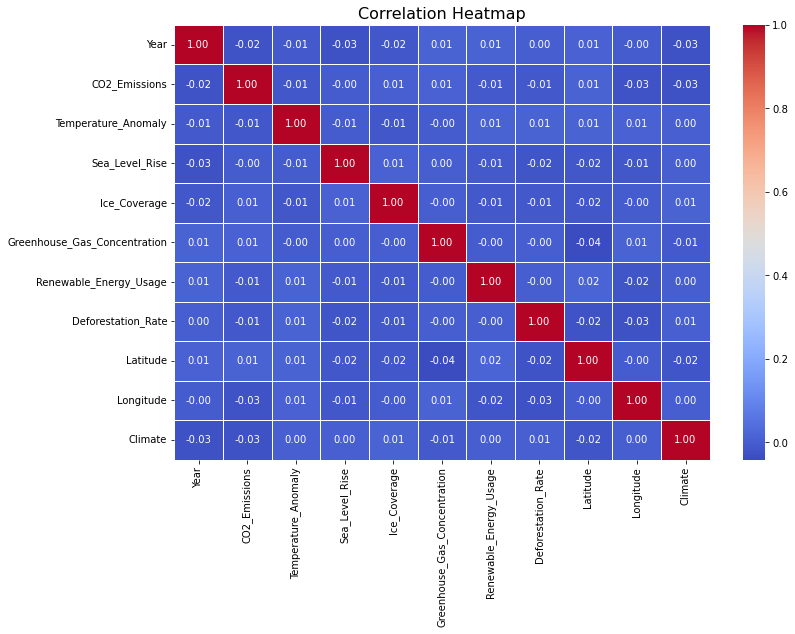

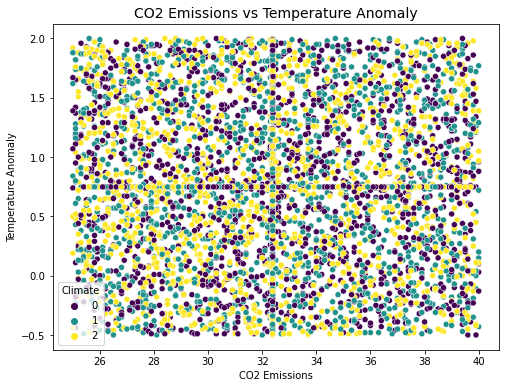

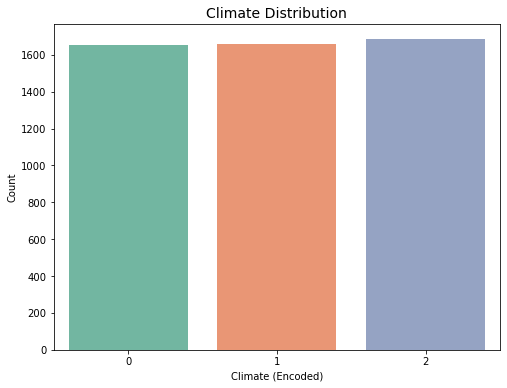

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read the data
data = pd.read_csv('climate_prediction_dataset_new.csv')

# Fill null values
# Numerical columns: Fill with mean
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Categorical columns: Fill with mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Encode the categorical column 'Climate' using LabelEncoder
label_encoder = LabelEncoder()
data['Climate'] = label_encoder.fit_transform(data['Climate'])

# Visualize the data
# 1. Distribution of Numerical Features
data[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 3. Scatter Plot for Key Variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO2_Emissions', y='Temperature_Anomaly', hue='Climate', data=data, palette='viridis')
plt.title('CO2 Emissions vs Temperature Anomaly', fontsize=14)
plt.xlabel('CO2 Emissions')
plt.ylabel('Temperature Anomaly')
plt.legend(title='Climate', loc='best')
plt.show()

# 4. Bar Plot of Climate Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Climate', data=data, palette='Set2')
plt.title('Climate Distribution', fontsize=14)
plt.xlabel('Climate (Encoded)')
plt.ylabel('Count')
plt.show()



Logistic Regression:

Accuracy: 33.20%
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29       496
           1       0.31      0.30      0.30       498
           2       0.35      0.44      0.39       506

    accuracy                           0.33      1500
   macro avg       0.33      0.33      0.33      1500
weighted avg       0.33      0.33      0.33      1500

Confusion Matrix:
 [[126 178 192]
 [132 149 217]
 [126 157 223]]

Random Forest:

Accuracy: 32.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.34      0.33       496
           1       0.30      0.30      0.30       498
           2       0.35      0.34      0.34       506

    accuracy                           0.32      1500
   macro avg       0.32      0.32      0.32      1500
weighted avg       0.32      0.32      0.32      1500

Confusion Matrix:
 [[169 184 143]
 [175 148 175]
 [

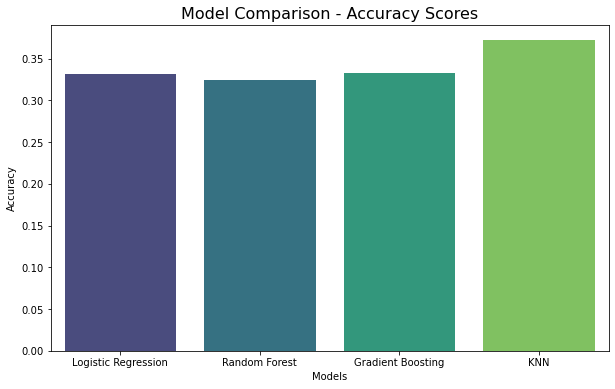

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
#data = pd.read_csv('climate_prediction_dataset_2018_2024_expanded_with_nulls.csv')

# Fill null values
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Encode the target column (Climate)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Climate'] = label_encoder.fit_transform(data['Climate'])

# Split data into features and target
X = data.drop(columns=['Climate', 'City', 'Country'])  # Drop categorical features not being used
y = data['Climate']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define algorithms to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name}:\n")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Model Comparison - Accuracy Scores', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()
